## Pandas exercises

### Step 1:
    
Use the **`babynames.csv`** file to create a DataFrame.

Print some information about the DataFrame and it's first five rows.

In [7]:
import pandas as pd
df = pd.read_csv('./datasets/babynames.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276087 entries, 0 to 276086
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Id1     276086 non-null  float64
 1   Id2     276086 non-null  float64
 2   Name    276085 non-null  object 
 3   Year    276085 non-null  float64
 4   Gender  276085 non-null  object 
 5   State   276085 non-null  object 
 6   Count   276085 non-null  float64
dtypes: float64(4), object(3)
memory usage: 14.7+ MB


,Id1,Id2,Name,Year,Gender,State,Count
0,11349.0,11350.0,Emma,2004.0,F,AK,62.0
1,11350.0,11351.0,Madison,2004.0,F,AK,48.0
2,11351.0,11352.0,Hannah,2004.0,F,AK,46.0
3,11352.0,11353.0,Grace,2004.0,F,AK,44.0
4,11353.0,11354.0,Emily,2004.0,F,AK,41.0


### Step 2:

Delete the column **`Id1`** and **`Id2`**

In [8]:
df.drop(['Id1','Id2'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276087 entries, 0 to 276086
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    276085 non-null  object 
 1   Year    276085 non-null  float64
 2   Gender  276085 non-null  object 
 3   State   276085 non-null  object 
 4   Count   276085 non-null  float64
dtypes: float64(2), object(3)
memory usage: 10.5+ MB


### Step 3:

Are there more male or female names in the dataset?

In [17]:
df['Gender'].value_counts()

F    156721
M    119364
Name: Gender, dtype: int64

### Step 4:

How many different names exist in the dataset?

In [9]:
df['Name'].value_counts().size
#or
len(df['Name'].value_counts())

13900

### Step 5:

What is the name with most occurrences?

In [11]:
names=df.groupby('Name')['Count'].sum()
names.sort_values(ascending=False, inplace=True)
print(names.index[0],names[0])

Jacob 73370.0


In [12]:
names=df.groupby('Name')['Count'].sum()
print(names.idxmax(), names.max())


Jacob 73370.0


### Step 6:

How many different names have the least occurrences?

In [13]:
names=df.groupby('Name')['Count'].sum()
len(names[names.min() == names])

2002

### Step 7:

Does the Name column contains any `NaN` value ?
What is the indexes of the corresponding rows?

In [14]:
df['Name'].isnull().sum()
df[df['Name'].isnull()].index

Int64Index([276081, 276086], dtype='int64')

### Step 8:

Remove the rows that contains a `NaN` value in the Name column

In [15]:
df.drop(df[df['Name'].isnull()].index, axis=0, inplace=True)
df['Name'].isnull().sum() # Just to check ...

#or
df.dropna(how='all', axis=0, inplace=True)

### Step 9:

List all the unique names that contain the sub-string **'ver'**:

In [16]:
df[df['Name'].str.contains('ver')].Name.unique()

array(['Avery', 'River', 'Everly', 'Oliver', 'Everett', 'Maverick',
       'Beverly', 'Averie', 'Averi', 'Everleigh', 'Denver', 'Ever',
       'Rivers', 'Everlee', 'Averee', 'Everardo', 'Trever', 'Guinevere',
       'Clover', 'Waverly', 'Gwenevere', 'Everley', 'Silver', 'Gwenivere',
       'Everlyn', 'Everlynn', 'Averey', 'Xaiver', 'Silverio', 'Everest',
       'Severin', 'Iverson', 'Maverik', 'Carver', 'Iver', 'Maveric',
       'Everette'], dtype=object)

### Step 10:

Convert the `Year` colum into `int`.

Count how many rows do concern year 2007 or 2008.


In [17]:
df.Year=df.Year.astype(int)
res=df[(df.Year==2008) | (df.Year==2007)]
res.info()
res.Year.size
len(res)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52021 entries, 639 to 273669
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    52021 non-null  object 
 1   Year    52021 non-null  int32  
 2   Gender  52021 non-null  object 
 3   State   52021 non-null  object 
 4   Count   52021 non-null  float64
dtypes: float64(1), int32(1), object(3)
memory usage: 2.2+ MB


52021

### Step 11:

Print the frequencies of the name `Denver` by year.

Year
2004    3
2005    4
2006    4
2007    3
2008    5
2009    3
2010    3
2011    4
2012    5
2013    4
2014    8
Name: Count, dtype: int64


<AxesSubplot:xlabel='Year'>

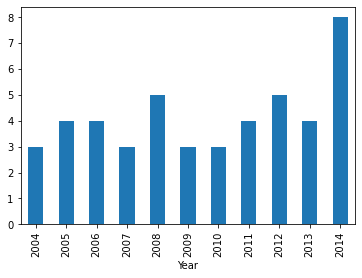

In [19]:
res=df[df['Name']=='Denver'].groupby('Year').Count.count()
print(res)
# To plot the result:
#res.plot.bar()
#sns.barplot(x=res.index, y=res.values)